## 导包

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg' # 输出矢量图

import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] # 防中文乱码

## 定义图像显示函数

In [2]:
def cv_show(name, img, delay=0):
    cv2.imshow(name, img)
    cv2.waitKey(delay)
    cv2.destroyAllWindows()
def plt_show(img, name = '', subplot = 111):
    plt.subplot(subplot)
    if len(img.shape) == 3:
        plt.imshow(img[:, :, ::-1])
    else:
        plt.imshow(img, cmap='gray')
    if len(name) > 0:
        plt.title(name)

## 读取图像

In [3]:
# 读取彩色图
img = cv2.imread('cat.png')

# 读取灰度图
# img = cv2.imread('cat.png', cv2.IMREAD_GRAYSCALE)

## 常用方法

### 获得图片尺寸

In [4]:
img.shape # [高度 h, 宽度 w, 颜色 c]

(600, 960, 3)

### 修改图片尺寸

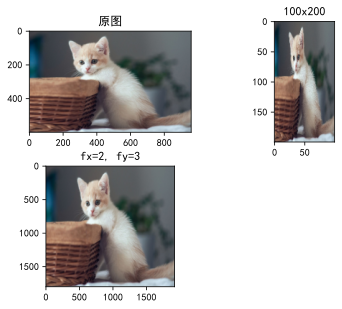

In [5]:
cv2.resize(img, (512, 512))
cv2.resize(img, (0, 0), fx=2, fy=3) # x 轴放大 2 倍，y 轴放大 3 倍

plt_show(img, '原图', 221)
plt_show(cv2.resize(img, (100, 200)), '100x200', 222)
plt_show(cv2.resize(img, (0, 0), fx=2, fy=3), 'fx=2, fy=3', 223)

### 显示图片

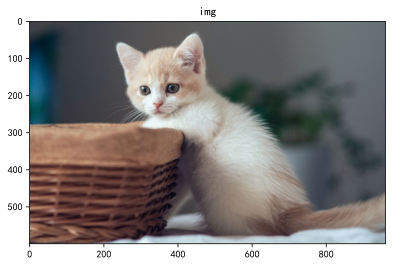

In [6]:
# cv_show('img', img)
plt_show(img, 'img')

### 截取部分图像数据

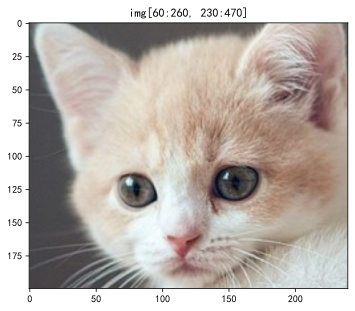

In [7]:
img[60:260, 230:470] # h: 200, w: 240

plt_show(img[60:260, 230:470], 'img[60:260, 230:470]')

### 颜色通道提取

In [8]:
b, g, r = cv2.split(img)

### 合并颜色通道

In [9]:
img = cv2.merge((b, g, r))

### 复制图片

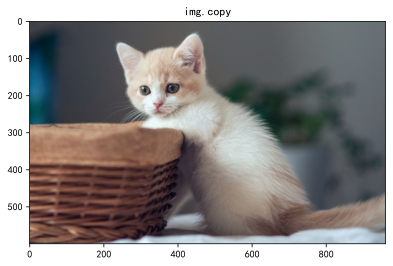

In [10]:
plt_show(img.copy(), 'img.copy')

### 删除指定颜色通道

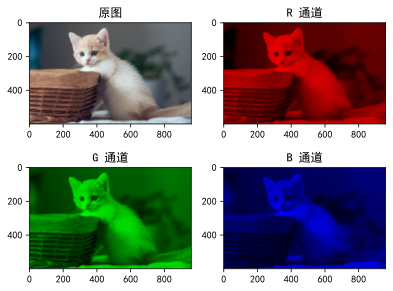

In [11]:
red_cat = img.copy()
red_cat[:, :, 0] = 0 # b
red_cat[:, :, 1] = 0 # g

green_cat = img.copy()
green_cat[:, :, 0] = 0 # b
green_cat[:, :, 2] = 0 # r

blue_cat = img.copy()
blue_cat[:, :, 1] = 0 # g
blue_cat[:, :, 2] = 0 # r

plt_show(img,'原图', 221)
plt_show(red_cat,'R 通道', 222)
plt_show(green_cat,'G 通道', 223)
plt_show(blue_cat,'B 通道', 224)

### 边界填充

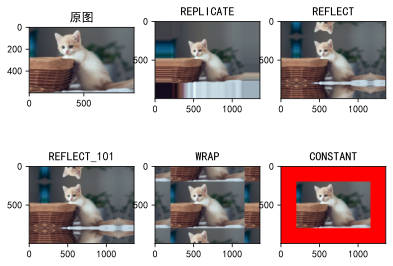

In [12]:
top, bottom, left, right = (200, 200, 200, 200)
replicate = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 255)) # value=(b, g, r)

plt_show(img, '原图', 231)
plt_show(replicate, 'REPLICATE', 232)
plt_show(reflect, 'REFLECT', 233)
plt_show(reflect101, 'REFLECT_101', 234)
plt_show(wrap, 'WRAP', 235)
plt_show(constant, 'CONSTANT', 236)

- BORDER_REPLICATE：复制法，也就是复制最边缘像素；
- BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制，`hgfedcba|abcdefgh|hgfedcba`；
- BORDER_REFLECT_1O1：反射法，也就是以最边缘像素为轴，对称，`hfedcb|abcdefgh|gfedcba`
- BORDER_WRAP：外包装法，`abcdefgh|abcdefgh|abcdefgh`
- BORDER_CONSTANT：常量法，常数值填充。

### 数值计算

#### 使用 numpy 进行数值计算

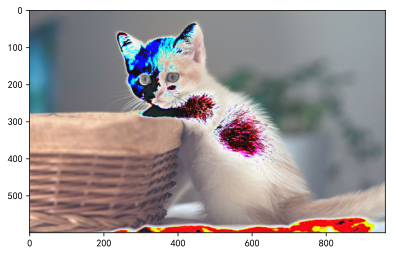

In [13]:
plt_show(img + 50)

In [14]:
img[:5, :, 0]

array([[ 70,  69,  68, ..., 115, 115, 115],
       [ 72,  71,  69, ..., 115, 116, 116],
       [ 72,  71,  70, ..., 116, 117, 118],
       [ 71,  71,  70, ..., 117, 117, 118],
       [ 71,  71,  70, ..., 117, 117, 116]], dtype=uint8)

In [15]:
# 超过 255 会自动求余，相当于 % 256
(img + 70)[:5, :, 0]

array([[140, 139, 138, ..., 185, 185, 185],
       [142, 141, 139, ..., 185, 186, 186],
       [142, 141, 140, ..., 186, 187, 188],
       [141, 141, 140, ..., 187, 187, 188],
       [141, 141, 140, ..., 187, 187, 186]], dtype=uint8)

In [16]:
# 同尺寸图片可以相加
(img + img.copy())[:5, :, 0]

array([[140, 138, 136, ..., 230, 230, 230],
       [144, 142, 138, ..., 230, 232, 232],
       [144, 142, 140, ..., 232, 234, 236],
       [142, 142, 140, ..., 234, 234, 236],
       [142, 142, 140, ..., 234, 234, 232]], dtype=uint8)

#### 使用 OpenCV 进行数值计算

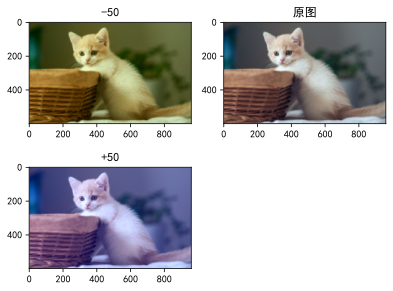

In [17]:
plt_show(cv2.add(img, -50), '-50', 221)
plt_show(img, '原图', 222)
plt_show(cv2.add(img, 50), '+50', 223)

In [18]:
img[:5, :, 0]

array([[ 70,  69,  68, ..., 115, 115, 115],
       [ 72,  71,  69, ..., 115, 116, 116],
       [ 72,  71,  70, ..., 116, 117, 118],
       [ 71,  71,  70, ..., 117, 117, 118],
       [ 71,  71,  70, ..., 117, 117, 116]], dtype=uint8)

In [19]:
# 超过 255 则为 255
cv2.add(img, 70)[:5, :, 0]

array([[140, 139, 138, ..., 185, 185, 185],
       [142, 141, 139, ..., 185, 186, 186],
       [142, 141, 140, ..., 186, 187, 188],
       [141, 141, 140, ..., 187, 187, 188],
       [141, 141, 140, ..., 187, 187, 186]], dtype=uint8)

### 图像阈值

- src：输入图，只能输入单通道图像，通常来说为灰度图
- dst：输出图
- thresh：阈值
- maxval：当像素值超过了阈值（或者小于阈值，根据 type 来决定），所赋予的值
- type：二值化操作的类型
  - `cv2.THRESH_BINARY` 超过阈值部分取 `maxval`（最大值），否则取 `0`
  - `cv2.THRESH_BINARY_INV` `THRESH_BINARY` 的反转
  - `cv2.THRESH_TRUNC` 大于阈值部分设为阈值，否则不变
  - `cv2.THRESH_TOZERO` 大于阈值部分不改变，否则设为 `0`
  - `cv2.THRESH_TOZERO_INV` `THRESH_TOZERO` 的反转

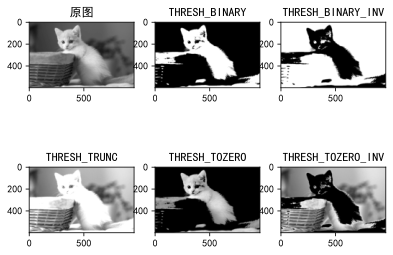

In [20]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

plt_show(img_gray, '原图', 231)
plt_show(thresh1, 'THRESH_BINARY', 232)
plt_show(thresh2, 'THRESH_BINARY_INV', 233)
plt_show(thresh3, 'THRESH_TRUNC', 234)
plt_show(thresh4, 'THRESH_TOZERO', 235)
plt_show(thresh5, 'THRESH_TOZERO_INV', 236)

### 图片融合

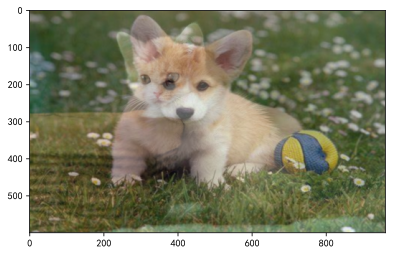

In [21]:
img_dog = cv2.imread('dog.jpg')
img_dog = cv2.resize(img_dog, (img.shape[1], img.shape[0]))

plt_show(cv2.addWeighted(img, 0.4, img_dog, 0.6, 0))

### 形态学

#### 腐蚀操作

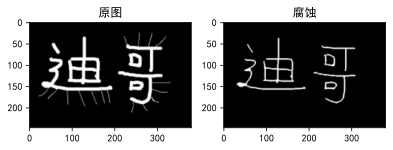

In [22]:
img_dege = cv2.imread('dege.png')
# 卷积核大小 3x3
kernel = np.ones((3, 3), np.uint8)
# 迭代次数为 1
img_erode = cv2.erode(img_dege, kernel, iterations=2)

plt_show(img_dege, '原图', 121)
plt_show(img_erode, '腐蚀', 122)

#### 膨胀操作

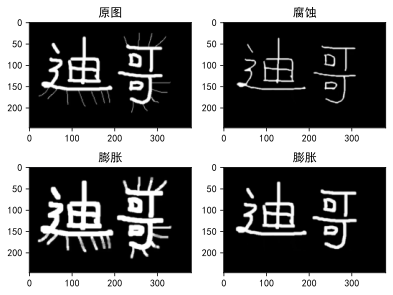

In [23]:
img_dilate = cv2.dilate(img_dege, kernel, iterations=2)
img_dilate2 = cv2.dilate(img_erode, kernel, iterations=2)

plt_show(img_dege, '原图', 221)
plt_show(img_erode, '腐蚀', 222)
plt_show(img_dilate, '膨胀', 223)
plt_show(img_dilate2, '膨胀', 224)

#### 开运算与闭运算

- 开运算：先腐蚀，再膨胀
- 闭运算：先膨胀，再腐蚀

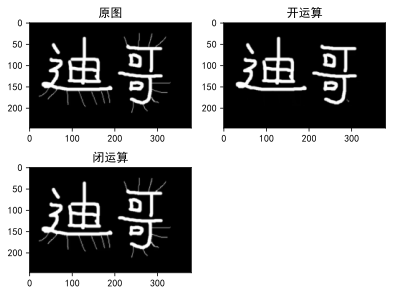

In [24]:
# 开运算
opening = cv2.morphologyEx(img_dege, cv2.MORPH_OPEN, kernel)
# 闭运算
closing = cv2.morphologyEx(img_dege, cv2.MORPH_CLOSE, kernel)

plt_show(img_dege, '原图', 221)
plt_show(opening, '开运算', 222)
plt_show(closing, '闭运算', 223)

#### 梯度运算

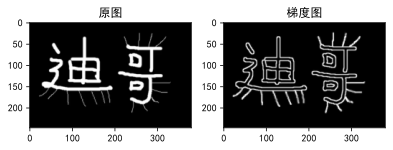

In [25]:
gradient = cv2.morphologyEx(img_dege, cv2.MORPH_GRADIENT, kernel)

plt_show(img_dege, '原图', 221)
plt_show(gradient, '梯度图', 222)

#### 礼帽与黑帽

- 礼帽 = 原始输入 - 开运算结果
- 黑帽 = 闭运算结果 - 原始输入

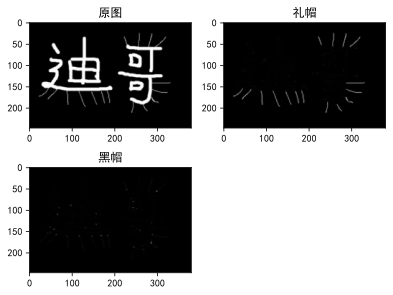

In [26]:
# 礼帽
tophat = cv2.morphologyEx(img_dege, cv2.MORPH_TOPHAT, kernel)
# 黑帽
blackhat = cv2.morphologyEx(img_dege, cv2.MORPH_BLACKHAT, kernel)

plt_show(img_dege, '原图', 221)
plt_show(tophat, '礼帽', 222)
plt_show(blackhat, '黑帽', 223)

## 梯度运算

### Sobel 算子

$$
G_x = 
\left [
\begin{matrix}
-1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1 \\
\end{matrix}
\right ] 
* A
$$

$$
G_y = 
\left [
\begin{matrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1 \\
\end{matrix}
\right ]
* A
$$

```py
cv2.Sobel(输入图像, 图像位深度, 水平方向, 竖直方向, ksize=卷积核大小)
```

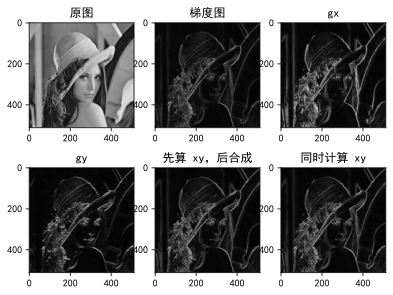

In [27]:
lena = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

lena_gradient = cv2.morphologyEx(lena, cv2.MORPH_GRADIENT, kernel)

gx = cv2.Sobel(lena, cv2.CV_64F, 1, 0, ksize=3)
gx = cv2.convertScaleAbs(gx)
gy = cv2.Sobel(lena, cv2.CV_64F, 0, 1, ksize=3)
gy = cv2.convertScaleAbs(gy)
gxy = cv2.Sobel(lena, cv2.CV_64F, 1, 1, ksize=3)
gxy = cv2.convertScaleAbs(gxy)
lena_gradient_sobel = cv2.addWeighted(gx, 0.5, gy, 0.5, 0)

plt_show(lena, '原图', 231)
plt_show(lena_gradient, '梯度图', 232)
plt_show(gx, 'gx', 233)
plt_show(gy, 'gy', 234)
plt_show(lena_gradient_sobel, '先算 xy，后合成', 235)
plt_show(lena_gradient_sobel, '同时计算 xy', 236)

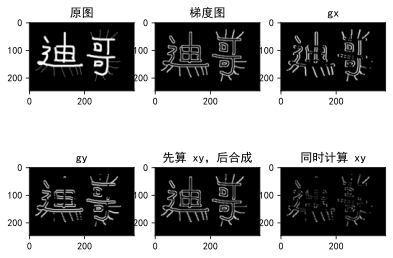

In [28]:
gx = cv2.Sobel(img_dege, cv2.CV_64F, 1, 0, ksize=3)
gx = cv2.convertScaleAbs(gx)
gy = cv2.Sobel(img_dege, cv2.CV_64F, 0, 1, ksize=3)
gy = cv2.convertScaleAbs(gy)
gxy = cv2.Sobel(img_dege, cv2.CV_64F, 1, 1, ksize=3)
gxy = cv2.convertScaleAbs(gxy)
img_dege_gradient_sobel = cv2.addWeighted(gx, 0.5, gy, 0.5, 0)

plt_show(img_dege, '原图', 231)
plt_show(gradient, '梯度图', 232)
plt_show(gx, 'gx', 233)
plt_show(gy, 'gy', 234)
plt_show(img_dege_gradient_sobel, '先算 xy，后合成', 235)
plt_show(gxy, '同时计算 xy', 236)

### Scharr 算子

$$
G_x = 
\left [
\begin{matrix}
-3 & 0 & +3 \\
-10 & 0 & +10 \\
-3 & 0 & +3 \\
\end{matrix}
\right ] 
* A
$$

$$
G_y = 
\left [
\begin{matrix}
-3 & -10 & -3 \\
0 & 0 & 0 \\
+3 & +10 & +3 \\
\end{matrix}
\right ]
* A
$$

特点：比 Sobel 算子更敏感

```py
cv2.Scharr(输入图像, 图像位深度, 水平方向, 竖直方向)
```

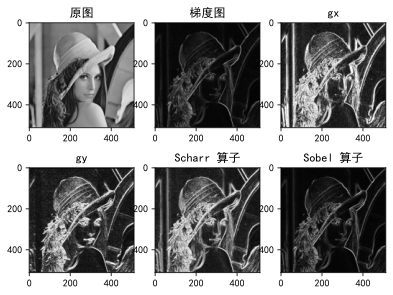

In [29]:
gx = cv2.Scharr(lena, cv2.CV_64F, 1, 0)
gx = cv2.convertScaleAbs(gx)
gy = cv2.Scharr(lena, cv2.CV_64F, 0, 1)
gy = cv2.convertScaleAbs(gy)
lena_gradient_scharr = cv2.addWeighted(gx, 0.5, gy, 0.5, 0)

plt_show(lena, '原图', 231)
plt_show(lena_gradient, '梯度图', 232)
plt_show(gx, 'gx', 233)
plt_show(gy, 'gy', 234)
plt_show(lena_gradient_scharr, 'Scharr 算子', 235)
plt_show(lena_gradient_sobel, 'Sobel 算子', 236)

### Laplacian 算子

$$
G = 
\left [
\begin{matrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0 \\
\end{matrix}
\right ]
$$

特点：对噪点敏感

```py
cv2.Laplacian(输入图像, 图像位深度)
```

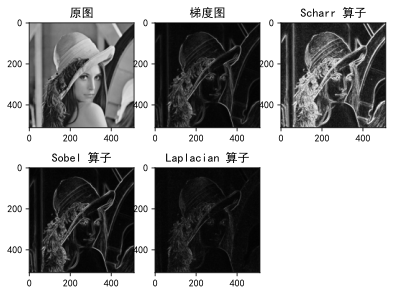

In [30]:
lena_gradient_laplacian = cv2.Laplacian(lena, cv2.CV_64F)
lena_gradient_laplacian = cv2.convertScaleAbs(lena_gradient_laplacian)

plt_show(lena, '原图', 231)
plt_show(lena_gradient, '梯度图', 232)
plt_show(lena_gradient_scharr, 'Scharr 算子', 233)
plt_show(lena_gradient_sobel, 'Sobel 算子', 234)
plt_show(lena_gradient_laplacian, 'Laplacian 算子', 235)

## 图像平滑

### 均值滤波

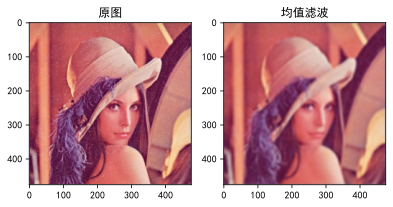

In [31]:
lena_Noise = cv2.imread('lenaNoise.png')

blur = cv2.blur(lena_Noise, (9, 9))

plt_show(lena_Noise, '原图', 121)
plt_show(blur, '均值滤波', 122)

### 方框滤波

```py
cv2.boxFilter(输入图像, 图像位深度, 卷积核, normalize=是否归一化)
```

- 图像位深度为 -1 时，表示自适应
- `normalize=True` 时，与均值滤波一样
- `normalize=False` 时，不会除以卷积核的大小，因此可能超过 255。超过 255，则为 255

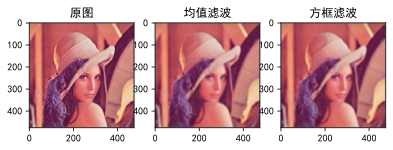

In [32]:
box = cv2.boxFilter(lena_Noise, -1, (9, 9), normalize=True)

plt_show(lena_Noise, '原图', 131)
plt_show(blur, '均值滤波', 132)
plt_show(box, '方框滤波', 133)

### 高斯滤波

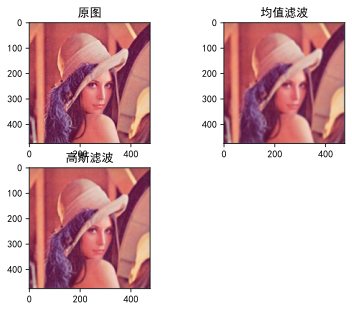

In [33]:
aussian = cv2.GaussianBlur(lena_Noise, (9, 9), 0)
plt_show(lena_Noise, '原图', 221)
plt_show(blur, '均值滤波', 222)
plt_show(aussian, '高斯滤波', 223)

### 中值滤波

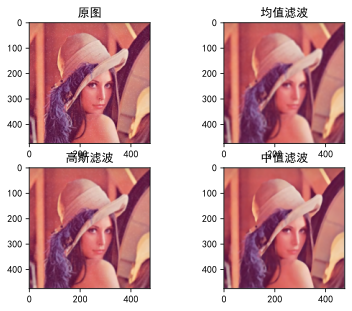

In [34]:
median = cv2.medianBlur(lena_Noise, 9)

plt_show(lena_Noise, '原图', 221)
plt_show(blur, '均值滤波', 222)
plt_show(aussian, '高斯滤波', 223)
plt_show(median, '中值滤波', 224)

## Canny 边缘检测

1. 使用高斯滤波器，以平滑图像，滤除噪声。
2. 计算图像中每个像素点的梯度强度和方向。
3. 应用非极大值（Non-Maximum Suppression）抑制，以消除边缘检测带来的杂散响应。
4. 应用双阈值（Double-Threshold）检测来确定真实的和潜在的边缘。
5. 通过抑制孤立的弱边缘最终完成边缘检测。

### 双阈值检查

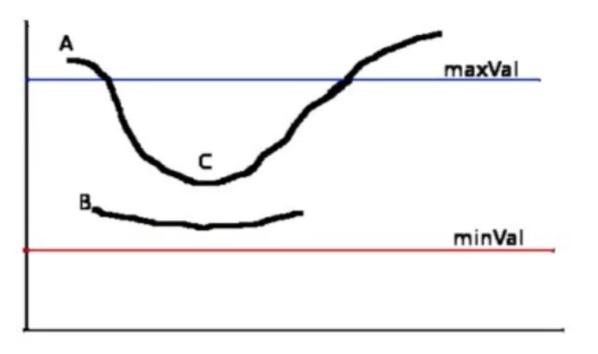

梯度值 > maxVal 则为边界  
minVal < 梯度值 < maxVal 连有边界则保留，否则舍弃  
梯度值 < minVal 则舍弃

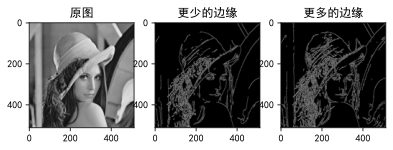

In [35]:
lenacan1 = cv2.Canny(lena, 80, 150)
lenacan2 = cv2.Canny(lena, 50, 100)

plt_show(lena, '原图', 131)
plt_show(lenacan1, '更少的边缘', 132)
plt_show(lenacan2, '更多的边缘', 133)